## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [47]:
# Start solution here
import pandas as pd
import numpy as np

# Pass data through pandas and into a df.
data = pd.read_csv('allfightdata.csv')
ufcdata = pd.DataFrame(data)
ufcdata = ufcdata.fillna(0)
pd.set_option('display.max_columns', None)

# Drop columns to consolidate dataset with only candidate variables
ufcdata.columns.get_loc("empty_arena")
ufcdata.drop(ufcdata.iloc[:,78:138],inplace = True, axis = 1)
ufcdata.drop(['date','location','country','title_bout','R_ev','B_ev','B_odds','weight_class','Winner','no_of_rounds'],axis = 1, inplace = True)
ufcdata.set_index(["R_fighter"]+["B_fighter"],inplace=True)
display(ufcdata.head())

,,R_odds,Red Winner,gender,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif
R_fighter,B_fighter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alistair Overeem,Alexander Volkov,150,0,MALE,0,1,0,4.76,0.58,0.2,0.69,0.70,4,2,26,0,0,1,2,3,0,0,6,Orthodox,200.66,203.20,250,0,2,0,3.71,0.64,0.8,1.44,0.56,11,15,83,1,1,0,4,20,8,0,33,Orthodox,193.04,203.20,265,40,32,0,-1,-7,-27,-13,-57,-1,-17,-8,7.62,0.00,-8,1.05,-0.6,-0.75
Cory Sandhagen,Frankie Edgar,-400,1,MALE,0,1,1,3.70,0.39,0.3,2.28,0.31,5,8,94,9,0,1,10,5,2,0,18,Orthodox,167.64,172.72,135,0,1,0,6.88,0.48,0.5,1.07,0.50,5,1,14,0,0,1,1,3,1,0,6,Switch,180.34,177.80,135,28,39,0,0,0,12,7,80,9,2,1,-12.70,-5.08,11,-3.18,-0.2,1.21
Alexandre Pantoja,Manel Kape,-125,1,MALE,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Southpaw,165.10,172.72,125,1,0,0,4.20,0.47,1.1,1.08,0.36,3,3,21,0,0,1,1,2,2,0,6,Orthodox,165.10,170.18,125,30,27,-1,0,-3,-6,-3,-21,0,-2,-2,0.00,2.54,-3,-4.20,-1.1,-1.08
Diego Ferreira,Beneil Dariush,-125,0,MALE,0,5,1,3.98,0.49,1.1,1.75,0.32,5,4,36,0,0,1,4,3,5,0,13,Southpaw,177.80,182.88,155,0,6,0,5.07,0.36,1.0,1.04,0.27,6,2,21,0,0,0,3,3,2,0,8,Orthodox,175.26,187.96,155,36,31,0,-1,-1,5,2,15,0,0,3,2.54,-5.08,-5,-1.09,0.1,0.71
Michael Johnson,Clay Guida,-225,0,MALE,2,0,0,2.41,0.33,0.7,3.37,0.38,4,15,87,0,0,3,8,2,4,0,17,Orthodox,170.18,177.80,155,3,0,0,4.23,0.38,0.1,0.51,0.45,4,12,58,0,0,1,6,4,0,0,11,Southpaw,177.80,185.42,155,34,39,-1,0,0,6,3,29,0,-2,4,-7.62,-7.62,5,-1.82,0.6,2.86


In [48]:
# One-hot encoding for categorical variables.

GenderMap = {'MALE': 1, 'FEMALE': 2}
ufcdata['gender'] = ufcdata['gender'].map(GenderMap)

StanceMap = {'Orthodox': 1, 'Southpaw': 2}
ufcdata['B_Stance'] = ufcdata['B_Stance'].map(GenderMap)
ufcdata['R_Stance'] = ufcdata['R_Stance'].map(GenderMap)
ufcdata = ufcdata.fillna(0)

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error

# To avoid overfitting, we will only focus on the Odds, Gender, then the differnces between the fighters in each category.

# Additionally, there were some incorrect values in the dataset for Significant Strikes, so it was removed as a possible feature. 
columns = ['R_odds','gender','lose_streak_dif',
       'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif',
       'total_round_dif', 'ko_dif', 'sub_dif',
       'height_dif', 'reach_dif', 'age_dif','avg_sub_att_dif',
       'avg_td_dif']

X = ufcdata[columns]
y = ufcdata["Red Winner"]

print(ufcdata.shape)
print(X.shape)
print(y.shape)

# Split Data

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,random_state=50
                                                    )

(4566, 66)
(4566, 15)
(4566,)


In [50]:
# Dummy Classifier with baseline accuracy

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_train,y_train)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5857321652065082


In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Create a bagging classifier
base_est = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_est,random_state = 42,n_estimators=10)
model_bag.fit(X_train, y_train)
pred_bagging = model_bag.predict(X_test)
acc_b = accuracy_score(y_test, pred_bagging)

print('Bagging Accuracy = ', acc_b)

Bagging Accuracy =  0.5846715328467154


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)

# Create a Random Forest Model

model_rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
acc_rf = accuracy_score(y_test, predict_rf)
print("Random Forest Accuracy:",acc_rf)

# Compare Features of RF model.
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by=["importance"],ascending=False)
print("Top 5 Features:\n",df[0:5])

Random Forest Accuracy: 0.6182481751824818
Top 5 Features:
            features  importance
0            R_odds    0.215670
14       avg_td_dif    0.104238
13  avg_sub_att_dif    0.086654
12          age_dif    0.084541
7   total_round_dif    0.080934


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an adaboost Model
base_est = DecisionTreeClassifier (max_depth=4)
ada = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada.fit(X_train, y_train)
predict_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test,predict_ada)
print("Ada Boost Accuracy",acc_ada)

feature_importances = ada.feature_importances_
features = X_train.columns
df_ada = pd.DataFrame({'features': features, 'importance': feature_importances})
df_ada = df_ada.sort_values(by=["importance"],ascending=False)
print("Top 5 Features:\n",df_ada[0:5])

labels = pd.DataFrame(data=y_test)

print(labels.head())

Ada Boost Accuracy 0.6299270072992701
Top 5 Features:
            features  importance
0            R_odds    0.183750
13  avg_sub_att_dif    0.114220
14       avg_td_dif    0.112120
7   total_round_dif    0.090443
6          loss_dif    0.076918
                                   Red Winner
R_fighter       B_fighter                    
Paul Kelly      TJ O'Brien                  1
Dennis Bermudez Chan Sung Jung              0
Igor Pokrajac   Jan Blachowicz              0
Donald Cerrone  Eddie Alvarez               1
Derrick Lewis   Junior Dos Santos           0


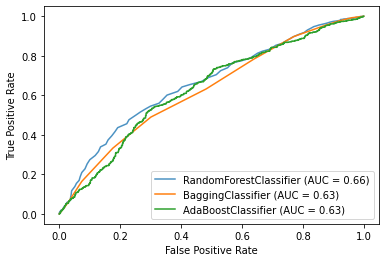

In [54]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Receiver Operator Characteristic (ROC) Plot
ax = plt.gca()
rf_roc = plot_roc_curve(model_rf, X_test, y_test, ax=ax, alpha=0.8)
bag_roc = plot_roc_curve(model_bag,X_test, y_test,ax=ax)
ada_roc = plot_roc_curve(ada,X_test, y_test,ax=ax)


Random Forest Acc: 0.632948 (0.016008)
Ada Boost Acc: 0.634698 (0.016252)
Bagging Acc: 0.589582 (0.015713)


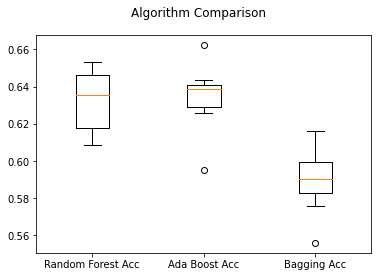

In [55]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from statistics import mean

# Initialize Cross-Validation by appending models to a CV loop.
scoring = 'accuracy'
models = []
models.append(('Random Forest Acc', model_rf))
models.append(('Ada Boost Acc', ada))
models.append(('Bagging Acc', model_bag))
results = []
names = []
for name,model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# Plot the Cross-Validation
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
Zhang_v_Namajunas = [[-180,0,0,-4,-2,1,3,15,0,2,2.54,5.08,-3,.3,.65]]

print("Using the Random Forest model, we can predict that the Red_Fighter, Zhang will win, with a win probability of",model_rf.predict_proba(Zhang_v_Namajunas)[:,1])
impliedwinpercent = ((-(-180))/(-(-180)+100)*100)
print("Given the Vegas odds of -180, Zhang's implied win % was",impliedwinpercent)

Using the Random Forest model, we can predict that the Red_Fighter, Zhang will win, with a win probability of [0.56]
Given the Vegas odds of -180, Zhang's implied win % was 64.28571428571429


In [57]:
print('Medium Article Link: https://patricmd.medium.com/predicting-ufc-fights-with-python-sklearn-ml-models-cd62fba47816')
print('Github Link: https://github.com/pdwyer13/UFC_ML_Modeling')

Medium Article Link: https://patricmd.medium.com/predicting-ufc-fights-with-python-sklearn-ml-models-cd62fba47816
Github Link: https://github.com/pdwyer13/UFC_ML_Modeling
